### **Auxiliar na Construção de uma Dieta Nutricional**

Geração 1 - Melhor Aptidão: 65.00280898876404
melhores individuos da geração 1: 
1 º -  [29, 13, 40, 15, 8, 35, 1, 6, 25, 34, 53, 40, 20, 18, 31, 40, 37, 17, 33, 25, 8, 19, 24, 18, 14, 28, 11, 1, 45, 8, 43, 37, 18, 14, 17, 3, 4, 12, 18, 4, 18, 26, 21, 37, 33, 28, 22, 7, 40, 34, 38, 29, 28, 3, 29, 45, 7, 4, 37, 38, 42, 31, 27]

Geração 2 - Melhor Aptidão: 65.03988764044945
melhores individuos da geração 2: 
1 º -  [27, 12, 40, 4, 9, 24, 29, 3, 28, 46, 7, 41, 14, 28, 17, 14, 7, 27, 39, 7, 15, 19, 35, 9, 13, 25, 26, 23, 40, 41, 20, 18, 8, 40, 27, 7, 1, 18, 25, 4, 0, 28, 14, 38, 27, 49, 53, 25, 40, 7, 9, 1, 31, 10, 21, 8, 13, 21, 37, 26, 20, 9, 36]

Geração 3 - Melhor Aptidão: 66.53370786516854
melhores individuos da geração 3: 
1 º -  [29, 13, 53, 14, 38, 0, 41, 32, 36, 26, 15, 7, 42, 37, 26, 39, 35, 28, 10, 40, 8, 13, 3, 34, 5, 31, 28, 50, 15, 2, 21, 16, 18, 5, 35, 38, 43, 18, 40, 41, 38, 7, 2, 18, 16, 11, 41, 25, 42, 38, 26, 42, 6, 37, 37, 14, 41, 12, 27, 35, 40, 7, 8]

Geração 4 - Melh

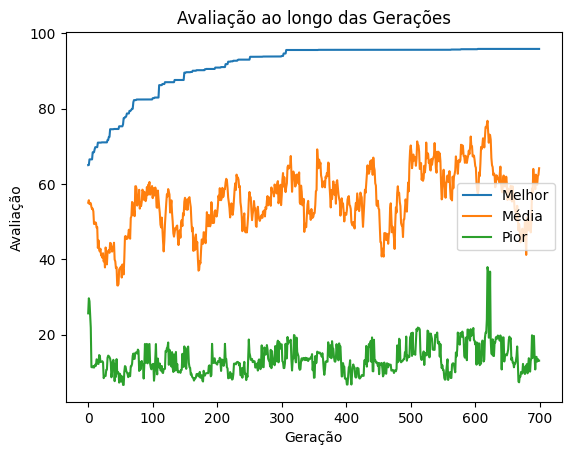

,Segunda-Feira,Terça-Feira,Quarta-Feira,Quinta-Feira,Sexta-Feira,Sábado,Domingo
CAFÉ DA MANHÃ,Tapioca com Nutella (principal)Creme de Amendoim (acompanhamento)Muffin de Mirtilo (acompanhamento),Bolinho de Chuva (principal)Biscoitos (acompanhamento)Muffin de Mirtilo (acompanhamento),Pudim (principal)Leite de Soja (acompanhamento)Muffin de Mirtilo (acompanhamento),Waffle com Morango (principal)Muffin de Mirtilo (acompanhamento)Granola (acompanhamento),Panqueca de Banana (principal)Granola (acompanhamento)Muffin de Mirtilo (acompanhamento),Pão com Presunto (principal)Granola (acompanhamento)Biscoitos (acompanhamento),Tapioca com Nutella (principal)Muffin de Mirtilo (acompanhamento)Molho de Tomate (acompanhamento)
ALMOÇO,Macarrão de Milho (principal)Queijo (acompanhamento)Grão-de-Bico (acompanhamento),Atum em Lata (principal)Salada de Cenoura Ralada (acompanhamento)Lentilhas (acompanhamento),Macarrão de Feijão Preto (principal)Alface (acompanhamento)Grão-de-bico (acompanhamento),Macarrão de Trigo Integral (principal)Queijo (acompanhamento)Grão-de-Bico (acompanhamento),Macarrão de Trigo Sarraceno (principal)Arroz Basmati (acompanhamento)Salada de Pepino (acompanhamento),Macarrão (principal)Salada de Tomate e Alface (acompanhamento)Salada de Lentilhas (acompanhamento),Macarrão de Feijão Preto (principal)Queijo (acompanhamento)Salada de Cenoura Ralada (acompanhamento)
JANTAR,Macarrão de Feijão Preto (principal)Arroz Integral (acompanhamento)Grão-de-bico (acompanhamento),Macarrão de Milho (principal)Queijo (acompanhamento)Grão-de-bico (acompanhamento),Macarrão de Milho (principal)Grão-de-Bico (acompanhamento)Queijo (acompanhamento),Espaguete (principal)Grão-de-Bico (acompanhamento)Arroz (acompanhamento),Macarrão de Arroz (principal)Grão-de-Bico (acompanhamento)Grão-de-bico (acompanhamento),Macarrão de Milho (principal)Arroz Basmati (acompanhamento)Arroz Selvagem (acompanhamento),Macarrão de Milho (principal)Salada de Alface e Rúcula (acompanhamento)Arroz Basmati (acompanhamento)


In [1]:
#from typing import Generator
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random
from IPython.display import display, HTML

#Classe da avaliação responsavel por armazenar o individuo e sua nota
class Avaliacao:
    def __init__(self, individuo, nota):
        self.individuo = individuo.copy()
        self.nota = nota

tamanho_populacao = 100
tamanho_cromossomo = 63
taxa_mutacao = 0.01
num_geracoes = 700
qtd_elitismo = 1

limitacoes = {
    "proteinas": 500,
    "calorias": 14000,
    "carboidratos": 2800,
    "gorduras": 500
}

alimentos_geral = [
    {"nome": "Arroz", "calorias": 130, "proteinas": 2.7, "carboidratos": 28, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Frango", "calorias": 165, "proteinas": 31, "carboidratos": 0, "gorduras": 3.6, "categorias":["principal"]},
    {"nome": "Ovos", "calorias": 68, "proteinas": 5.5, "carboidratos": 0.6, "gorduras": 4.8, "categorias":["principal"]},
    {"nome": "Feijão", "calorias": 110, "proteinas": 6, "carboidratos": 20, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Batata", "calorias": 77, "proteinas": 2, "carboidratos": 17, "gorduras": 0.1, "categorias":["principal"]},
    {"nome": "Salmão", "calorias": 206, "proteinas": 22, "carboidratos": 0, "gorduras": 13, "categorias":["principal"]},
    {"nome": "Brócolis", "calorias": 55, "proteinas": 3.7, "carboidratos": 11.2, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Espinafre", "calorias": 23, "proteinas": 2.9, "carboidratos": 3.6, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Cenoura", "calorias": 41, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Lentilhas", "calorias": 116, "proteinas": 9, "carboidratos": 20, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Queijo", "calorias": 402, "proteinas": 25, "carboidratos": 2.3, "gorduras": 33, "categorias":["acompanhamento"]},
    {"nome": "Tomate", "calorias": 18, "proteinas": 0.9, "carboidratos": 4, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Camarão", "calorias": 85, "proteinas": 18, "carboidratos": 1, "gorduras": 1.7, "categorias":["principal"]},
    {"nome": "Macarrão", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Carne de Boi", "calorias": 250, "proteinas": 26, "carboidratos": 0, "gorduras": 17, "categorias":["principal"]},
    {"nome": "Carne de Porco", "calorias": 242, "proteinas": 25, "carboidratos": 0, "gorduras": 16, "categorias":["principal"]},
    {"nome": "Alface", "calorias": 5, "proteinas": 0.5, "carboidratos": 1, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Couve", "calorias": 49, "proteinas": 4.9, "carboidratos": 8.4, "gorduras": 0.8, "categorias":["acompanhamento"]},
    {"nome": "Arroz Integral", "calorias": 111, "proteinas": 2.6, "carboidratos": 23.5, "gorduras": 0.9, "categorias":["acompanhamento"]},
    {"nome": "Macarrão de Trigo Integral", "calorias": 180, "proteinas": 7.5, "carboidratos": 37.5, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Carne de Frango Grelhada", "calorias": 165, "proteinas": 31, "carboidratos": 0, "gorduras": 3.6, "categorias":["principal"]},
    {"nome": "Carne de Peito de Peru", "calorias": 135, "proteinas": 30, "carboidratos": 0, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Atum em Lata", "calorias": 116, "proteinas": 26, "carboidratos": 0, "gorduras": 0.6, "categorias":["principal"]},
    {"nome": "Salada de Tomate e Alface", "calorias": 30, "proteinas": 1.5, "carboidratos": 5, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Salada de Alface e Rúcula", "calorias": 20, "proteinas": 1.5, "carboidratos": 3, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Quinoa", "calorias": 120, "proteinas": 4.1, "carboidratos": 21, "gorduras": 1.9, "categorias":["acompanhamento"]},
    {"nome": "Arroz Integral", "calorias": 111, "proteinas": 2.6, "carboidratos": 23.5, "gorduras": 0.9, "categorias":["acompanhamento"]},
    {"nome": "Grão-de-bico", "calorias": 164, "proteinas": 8.9, "carboidratos": 27.4, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Salada de Lentilhas", "calorias": 143, "proteinas": 9.1, "carboidratos": 24.2, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Espaguete", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Massa Penne", "calorias": 200, "proteinas": 7, "carboidratos": 42, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Salada de Beterraba", "calorias": 43, "proteinas": 1.6, "carboidratos": 9.6, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Salada de Cenoura Ralada", "calorias": 41, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Salada de Pepino", "calorias": 16, "proteinas": 0.6, "carboidratos": 3.6, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Salada de Abobrinha", "calorias": 20, "proteinas": 1.1, "carboidratos": 4.8, "gorduras": 0.2, "categorias":["acompanhamento"]},
    {"nome": "Feijão Preto", "calorias": 132, "proteinas": 7.5, "carboidratos": 23.6, "gorduras": 0.6, "categorias":["acompanhamento"]},
    {"nome": "Grão-de-Bico", "calorias": 164, "proteinas": 8.9, "carboidratos": 27.4, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Arroz Basmati", "calorias": 150, "proteinas": 3.5, "carboidratos": 35, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Arroz Selvagem", "calorias": 166, "proteinas": 6.5, "carboidratos": 36, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Macarrão de Trigo Sarraceno", "calorias": 344, "proteinas": 12, "carboidratos": 70, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Milho", "calorias": 357, "proteinas": 6, "carboidratos": 81, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Arroz", "calorias": 192, "proteinas": 3, "carboidratos": 43, "gorduras": 0.5, "categorias":["principal"]},
    {"nome": "Macarrão de Feijão Preto", "calorias": 358, "proteinas": 21, "carboidratos": 62, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Macarrão de Abobrinha", "calorias": 17, "proteinas": 1.2, "carboidratos": 3.6, "gorduras": 0.2, "categorias":["principal"]}]

alimentos_cafe = [
    {"nome": "Pão de Centeio", "calorias": 83, "proteinas": 2.7, "carboidratos": 17.2, "gorduras": 0.9, "categorias":["principal"]},
    {"nome": "Pão de Forma", "calorias": 265, "proteinas": 10, "carboidratos": 51, "gorduras": 2.4, "categorias":["principal"]},
    {"nome": "Leite de Soja", "calorias": 54, "proteinas": 3.3, "carboidratos": 1.5, "gorduras": 4.2, "categorias":["acompanhamento"]},
    {"nome": "Iogurte com Granola", "calorias": 180, "proteinas": 6, "carboidratos": 30, "gorduras": 3, "categorias":["acompanhamento"]},
    {"nome": "Cereal com Frutas", "calorias": 220, "proteinas": 4, "carboidratos": 50, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Pão de Queijo", "calorias": 160, "proteinas": 4, "carboidratos": 14, "gorduras": 10, "categorias":["principal"]},
    {"nome": "Bolo de Banana", "calorias": 240, "proteinas": 3, "carboidratos": 50, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Granola", "calorias": 231, "proteinas": 4.3, "carboidratos": 45, "gorduras": 2.6, "categorias":["acompanhamento"]},
    {"nome": "Creme de Amendoim", "calorias": 190, "proteinas": 7, "carboidratos": 7, "gorduras": 16, "categorias":["acompanhamento"]},
    {"nome": "Panqueca de Aveia", "calorias": 124, "proteinas": 6, "carboidratos": 20, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Mingau de Aveia", "calorias": 143, "proteinas": 4, "carboidratos": 25, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Cereais Integrais", "calorias": 120, "proteinas": 4, "carboidratos": 24, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Mamão", "calorias": 59, "proteinas": 0.6, "carboidratos": 15, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Pêssego", "calorias": 39, "proteinas": 0.9, "carboidratos": 10, "gorduras": 0.3, "categorias":["acompanhamento"]},
    {"nome": "Iogurte Grego", "calorias": 100, "proteinas": 10, "carboidratos": 4, "gorduras": 6, "categorias":["acompanhamento"]},
    {"nome": "Café com Leite", "calorias": 60, "proteinas": 2.5, "carboidratos": 7, "gorduras": 2.5, "categorias":["acompanhamento"]},
    {"nome": "Suco de Laranja", "calorias": 120, "proteinas": 1, "carboidratos": 28, "gorduras": 0.5, "categorias":["acompanhamento"]},
    {"nome": "Creme de Avelã", "calorias": 100, "proteinas": 1, "carboidratos": 8, "gorduras": 7, "categorias":["acompanhamento"]},
    {"nome": "Geleia de Morango", "calorias": 50, "proteinas": 0, "carboidratos": 13, "gorduras": 0, "categorias":["acompanhamento"]},
    {"nome": "Torrada Integral", "calorias": 80, "proteinas": 3, "carboidratos": 14, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Abacate na Torrada", "calorias": 200, "proteinas": 4, "carboidratos": 15, "gorduras": 15, "categorias":["principal"]},
    {"nome": "Waffle", "calorias": 218, "proteinas": 4, "carboidratos": 24, "gorduras": 12, "categorias":["principal"]},
    {"nome": "Geléia de Frutas", "calorias": 48, "proteinas": 0.3, "carboidratos": 12, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Tapioca", "calorias": 129, "proteinas": 0.2, "carboidratos": 31, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Iogurte de Morango", "calorias": 150, "proteinas": 5, "carboidratos": 27, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Geleia de Framboesa", "calorias": 52, "proteinas": 0, "carboidratos": 13, "gorduras": 0.1, "categorias":["acompanhamento"]},
    {"nome": "Pão de Alho", "calorias": 200, "proteinas": 5, "carboidratos": 36, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Mingau de Milho", "calorias": 150, "proteinas": 3, "carboidratos": 35, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Batata Doce", "calorias": 90, "proteinas": 2, "carboidratos": 20, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Pão de Mel", "calorias": 380, "proteinas": 4, "carboidratos": 75, "gorduras": 7, "categorias":["principal"]},
    {"nome": "Pudim", "calorias": 110, "proteinas": 1, "carboidratos": 25, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Torrada com Abacate", "calorias": 150, "proteinas": 2, "carboidratos": 15, "gorduras": 9, "categorias":["principal"]},
    {"nome": "Salada de Frutas", "calorias": 120, "proteinas": 1, "carboidratos": 30, "gorduras": 0.5, "categorias":["principal"]},
    {"nome": "Pão com Nutella", "calorias": 200, "proteinas": 3, "carboidratos": 30, "gorduras": 8, "categorias":["principal"]},
    {"nome": "Crepes", "calorias": 110, "proteinas": 3, "carboidratos": 15, "gorduras": 4, "categorias":["principal"]},
    {"nome": "Torrada com Manteiga", "calorias": 120, "proteinas": 2, "carboidratos": 15, "gorduras": 6, "categorias":["principal"]},
    {"nome": "Pão de Frutas", "calorias": 200, "proteinas": 3, "carboidratos": 45, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Croissant", "calorias": 231, "proteinas": 5, "carboidratos": 24, "gorduras": 14, "categorias":["principal"]},
    {"nome": "Donuts", "calorias": 195, "proteinas": 2, "carboidratos": 22, "gorduras": 11, "categorias":["principal"]},
    {"nome": "Bagel", "calorias": 245, "proteinas": 10, "carboidratos": 50, "gorduras": 1.5, "categorias":["principal"]},
    {"nome": "Muffin de Mirtilo", "calorias": 385, "proteinas": 5, "carboidratos": 61, "gorduras": 14, "categorias":["acompanhamento"]},
    {"nome": "Goiaba", "calorias": 68, "proteinas": 2.5, "carboidratos": 14, "gorduras": 0.7, "categorias":["acompanhamento"]},
    {"nome": "Salsicha", "calorias": 229, "proteinas": 6, "carboidratos": 1, "gorduras": 22, "categorias":["principal"]},
    {"nome": "Omelete", "calorias": 140, "proteinas": 13, "carboidratos": 1, "gorduras": 10, "categorias":["principal"]},
    {"nome": "Cuscuz", "calorias": 200, "proteinas": 5, "carboidratos": 45, "gorduras": 0.2, "categorias":["principal"]},
    {"nome": "Molho de Tomate", "calorias": 82, "proteinas": 1, "carboidratos": 18, "gorduras": 0.4, "categorias":["acompanhamento"]},
    {"nome": "Panqueca de Banana", "calorias": 110, "proteinas": 2, "carboidratos": 24, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Tapioca com Queijo", "calorias": 280, "proteinas": 6, "carboidratos": 35, "gorduras": 12, "categorias":["principal"]},
    {"nome": "Waffle com Morango", "calorias": 180, "proteinas": 5, "carboidratos": 40, "gorduras": 1, "categorias":["principal"]},
    {"nome": "Pão de Batata", "calorias": 160, "proteinas": 3, "carboidratos": 30, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Tapioca com Nutella", "calorias": 320, "proteinas": 4, "carboidratos": 50, "gorduras": 11, "categorias":["principal"]},
    {"nome": "Cereais com Leite", "calorias": 200, "proteinas": 6, "carboidratos": 40, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Iogurte com Morango", "calorias": 150, "proteinas": 5, "carboidratos": 30, "gorduras": 2, "categorias":["principal"]},
    {"nome": "Biscoitos", "calorias": 150, "proteinas": 2, "carboidratos": 25, "gorduras": 4, "categorias":["acompanhamento"]},
    {"nome": "Pão com Presunto", "calorias": 220, "proteinas": 9, "carboidratos": 45, "gorduras": 2.5, "categorias":["principal"]},
    {"nome": "Bolinho de Chuva", "calorias": 260, "proteinas": 3, "carboidratos": 38, "gorduras": 11, "categorias":["principal"]}
]

def criar_cromossomo(tamanho_cromossomo):
    import random

    def adicionar_genes(categorias_alimentos, quantidade_acompanhamento):
        genes = []
        principal = random.choice(categorias_alimentos["principal"])
        genes.append(principal)
        acompanhamentos = random.sample(categorias_alimentos["acompanhamento"], quantidade_acompanhamento)
        genes.extend(acompanhamentos)
        return genes

    def separar_alimentos_por_categoria(alimentos):
        categorias = {"principal": [], "acompanhamento": []}
        for indice, alimento in enumerate(alimentos):
            for categoria in alimento["categorias"]:
                categorias[categoria].append(indice)
        return categorias

    categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe)
    categorias_geral = separar_alimentos_por_categoria(alimentos_geral)

    cromossomo_indices = []  # Lista para armazenar os índices dos alimentos no cromossomo

    # Adiciona genes alternando entre as listas de alimentos
    while len(cromossomo_indices) < tamanho_cromossomo:
        if len(cromossomo_indices) % 9 < 3:  # Primeiros 3 genes de cada 9 são de alimentos_cafe
            genes_indices = adicionar_genes(categorias_cafe, 2)
            cromossomo_indices.extend(genes_indices)
        else:  # Os próximos 6 genes são de alimentos_geral
            genes_indices = adicionar_genes(categorias_geral, 2)
            cromossomo_indices.extend(genes_indices)

    return cromossomo_indices

def avaliar_fitness_certa(cromossomo, alimentos_cafe, alimentos_geral, limites):
    total_proteinas = total_carboidratos = total_gorduras = total_calorias = 0

    # Faz com que a checagem use a lista correta
    for i, gene in enumerate(cromossomo):
        if (i % 9 < 3):
          alimentos = alimentos_cafe
        else:
          alimentos = alimentos_geral
        if gene < len(alimentos):
            alimento = alimentos[gene]

            total_proteinas += alimento["proteinas"]
            total_carboidratos += alimento["carboidratos"]
            total_gorduras += alimento["gorduras"]
            total_calorias += alimento["calorias"]

    valor_total = total_proteinas + total_carboidratos + total_gorduras + total_calorias
    penalidades = 0
    diferenca = 0

    if total_proteinas > limites["proteinas"]:
        diferenca += (total_proteinas - limites["proteinas"])
        penalidades += 1

    if total_carboidratos > limites["carboidratos"]:
        diferenca += (total_carboidratos - limites["carboidratos"])
        penalidades += 1

    if total_gorduras > limites["gorduras"]:
        diferenca += (total_gorduras - limites["gorduras"])
        penalidades += 1

    if total_calorias > limites["calorias"]:
        diferenca += (total_calorias - limites["calorias"])
        penalidades += 1

    #Aplica penalidade para duplicatas
    for i in range(1, len(cromossomo), 3):
      acomp1 = cromossomo[i]
      acomp2 = cromossomo[i + 1]
      if acomp1 == acomp2:
          diferenca += 1
          penalidades += 1

        # Se não houver penalidades, calcular o fitness normalmente
    if penalidades == 0:
        fitness = (valor_total / (limites["proteinas"] + limites["carboidratos"] + limites["gorduras"] + limites["calorias"]))*100
    else:
        # Caso contrário, penalizar o fitness
        fitness = (valor_total / ((limites["proteinas"] + limites["carboidratos"] + limites["gorduras"] + limites["calorias"] + diferenca) * (penalidades * 2)))*100

    return Avaliacao(cromossomo, fitness)

def selecionar_pais(populacao, avaliacoes):
    import random

    probabilidades = [avaliacao.nota / sum(avaliacao.nota for avaliacao in avaliacoes) for avaliacao in avaliacoes]
    # Seleciona pai1 com base nas probabilidades
    pai1_idx = random.choices(range(len(populacao)), weights=probabilidades)[0]
    pai1 = populacao[pai1_idx]

    # Seleciona pai2 com base nas probabilidades
    pai2_idx = random.choices(range(len(populacao)), weights=probabilidades)[0]
    pai2 = populacao[pai2_idx]

    return pai1, pai2

def cruzamento(pai1, pai2):
  # Faz o cruzamento entre os pais com ponto de corte único
    if random.random() < 0.80:
        ponto_de_corte = random.randint(0, len(pai1))
        filho1 = pai1[:ponto_de_corte] + pai2[ponto_de_corte:]
        filho2 = pai2[:ponto_de_corte] + pai1[ponto_de_corte:]
    else:
        filho1, filho2 = pai1, pai2

    return filho1, filho2

def mutacao(filho, taxa_mutacao):
    #Separa novamente os alimentos por categoria
    def separar_alimentos_por_categoria(alimentos):
        categorias = {"principal": [], "acompanhamento": []}
        for indice, alimento in enumerate(alimentos):
            for categoria in alimento["categorias"]:
                categorias[categoria].append(indice)
        return categorias

    categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe)
    categorias_geral = separar_alimentos_por_categoria(alimentos_geral)

    #Percorre o tamanho do filho, checando se há mutação, e se há mutação, qual lista deve ser usada e qual categoria deve ser adicionada
    for i in range(len(filho)):
        if random.random() < taxa_mutacao:
            if i % 9 == 0 or i % 9 == 3 or i % 9 == 6:  # Principais
                if i % 9 == 0:  # Alimentos do café
                    novo_gene = random.choice(categorias_cafe['principal'])
                else:  # Alimentos gerais
                    novo_gene = random.choice(categorias_geral['principal'])
            else:  # Acompanhamentos
                if i % 9 < 3:  # Alimentos do café
                    novo_gene = random.choice(categorias_cafe['acompanhamento'])
                else:  # Alimentos gerais
                    novo_gene = random.choice(categorias_geral['acompanhamento'])
            filho[i] = novo_gene

    return filho

#Seleciona os n melhores indivíduos com base em suas avaliações | Aonde n é o valor de qtd_elitismo
def elitismo(avaliacoes):
    return avaliacoes[:qtd_elitismo]

#Exibe tabela dieta cromossomo formatada
def print_cromossomo(cromossomo):
     dias_semana = ['Segunda-Feira', 'Terça-Feira', 'Quarta-Feira', 'Quinta-Feira', 'Sexta-Feira', 'Sábado', 'Domingo']
     dt_cafe = []
     dt_almoco = []
     dt_jantar = []

     for i in range(0, len(cromossomo), 3):
        alimentoLinha = []
        for c in range(3):
            gene = cromossomo[i + c]
            if i % 9 < 3:
                alimento = alimentos_cafe[gene]
            else:
                alimento = alimentos_geral[gene]

            alimentoLinha.append(f"{alimento['nome']} ({', '.join(alimento['categorias'])})")

        refeicao = dt_cafe if i % 9 < 3 else (dt_almoco if i % 9 < 6 else dt_jantar)
        refeicao.append("\\n".join(alimentoLinha))

     dt_todos = {"CAFÉ DA MANHÃ" : dt_cafe, "ALMOÇO" : dt_almoco, "JANTAR" : dt_jantar}
     df_tabela = pd.DataFrame(dt_todos, index=dias_semana).T
     display(HTML("<h2>DIETA FINAL:</h2>" +  df_tabela.to_html().replace("\\n","<br>")))


melhores = []
piores = []
media = []
populacao = []

for _ in range(tamanho_populacao):
    cromossomo_indices = criar_cromossomo(tamanho_cromossomo)
    populacao.append(cromossomo_indices)

for geracao in range(num_geracoes):

    # Avaliação da aptidão da população
    avaliacoes = [(avaliar_fitness_certa(cromossomo, alimentos_cafe, alimentos_geral, limitacoes)) for cromossomo in populacao]
    avaliacoes.sort(key=lambda x: x.nota, reverse=True)

    melhores_individuos = elitismo(avaliacoes)
    pior_avaliacao = avaliacoes[-1]
    media_geracao = sum(avaliacao.nota for avaliacao in avaliacoes) / len(avaliacoes)

    melhores.append(melhores_individuos[0].nota)
    piores.append(pior_avaliacao.nota)
    media.append(media_geracao)

    # Imprime a melhor aptidão da geração atual
    print(f"Geração {geracao + 1} - Melhor Aptidão: {melhores_individuos[0].nota}")
    print(f"melhores individuos da geração {geracao + 1}: ")
    for i in range(qtd_elitismo):
      print(i+1, "º - ", melhores_individuos[i].individuo)
    print()

    # Substitui a população antiga pela nova
    nova_populacao = [melhor.individuo.copy() for melhor in melhores_individuos]
    while len(nova_populacao) < tamanho_populacao:  # Um espaço é reservado para o melhor cromossomo
        pai1, pai2 = selecionar_pais(populacao, avaliacoes)
        filho1, filho2 = cruzamento(pai1, pai2)
        filho1 = mutacao(filho1, taxa_mutacao)
        filho2 = mutacao(filho2, taxa_mutacao)
        nova_populacao.append(filho1)
        nova_populacao.append(filho2)

    # Atualiza a população atual com a nova população
    populacao = nova_populacao
    #print(populacao)

print()

geracoes = list(range(num_geracoes))
plt.plot(geracoes, melhores, label='Melhor')
plt.plot(geracoes, media, label='Média')
plt.plot(geracoes, piores, label='Pior')
plt.xlabel('Geração')
plt.ylabel('Avaliação')
plt.legend()
plt.title('Avaliação ao longo das Gerações')
plt.show()

print()

print_cromossomo(melhores_individuos[0].individuo)

### Normal, 0.01 mutação & 200 pop & 700 gerações & 1 elitismo

Geração 700 - Melhor Aptidão: 95.85786516853932 - [29, 40, 14, 39, 18, 23, 13, 37, 25, 38, 53, 40, 13, 38, 10, 40, 36, 32, 39, 40, 16, 14, 38, 34, 30, 36, 10, 54, 40, 7, 40, 38, 26, 13, 38, 36, 50, 8, 7, 13, 36, 35, 40, 36, 10, 47, 53, 3, 41, 38, 36, 19, 18, 3, 29, 41, 40, 13, 18, 10, 42, 10, 38]

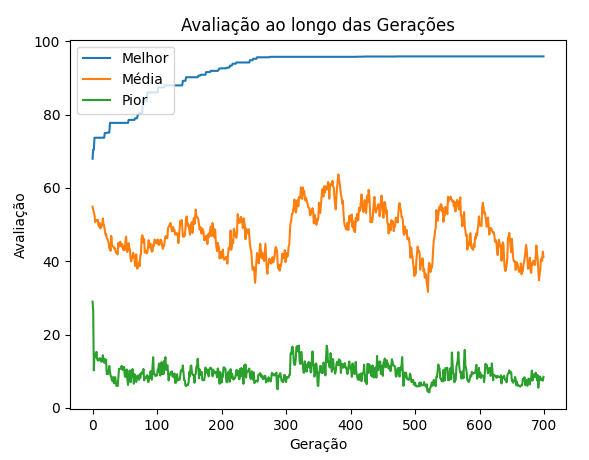

### 0.01 mutação & 200 pop & 700 gerações & 2 elitismo

Geração 700 - Melhor Aptidão: 96.24494382022472

1 º -  [48, 40, 14, 40, 23, 38, 13, 9, 10, 44, 40, 16, 13, 10, 38, 39, 17, 27, 4, 53, 40, 42, 37, 10, 19, 31, 35, 20, 22, 40, 42, 38, 25, 39, 38, 10, 4, 3, 25, 29, 37, 6, 40, 18, 38, 1, 40, 7, 39, 38, 0, 42, 3, 32, 50, 18, 40, 39, 27, 37, 40, 10, 35] Nota -  96.24494382022472

2 º -  [48, 40, 14, 40, 23, 38, 13, 9, 10, 44, 40, 16, 13, 10, 38, 39, 17, 27, 4, 53, 40, 42, 37, 10, 19, 31, 35, 20, 22, 40, 42, 38, 25, 39, 38, 10, 4, 3, 25, 29, 37, 6, 40, 18, 38, 1, 40, 7, 39, 38, 0, 42, 3, 32, 50, 18, 40, 39, 27, 37, 40, 10, 35] Nota -  96.24494382022472

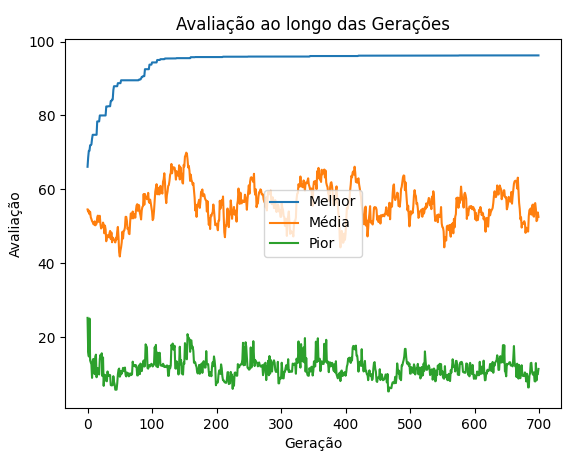

### VERSÃO C++

In [ ]:
%%writefile alg.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>
#include <algorithm>
#include <random>
#include <numeric>
#include <fstream>
#include <stdio.h>

struct Alimento {
    std::string nome;
    int calorias;
    float proteinas;
    float carboidratos;
    float gorduras;
    std::vector<std::string> categorias;
};

typedef std::vector<int> Individuo;

typedef struct {
    Individuo individuo;
    double nota;
} Avaliacao;

const std::vector<Alimento> alimentos_geral = {
    {"Arroz", 130, 2.7, 28, 0.3, {"acompanhamento"}},
    {"Frango", 165, 31, 0, 3.6, {"principal"}},
    {"Ovos", 68, 5.5, 0.6, 4.8, {"principal"}},
    {"Feijão", 110, 6, 20, 0.6, {"acompanhamento"}},
    {"Batata", 77, 2, 17, 0.1, {"principal"}},
    {"Salmão", 206, 22, 0, 13, {"principal"}},
    {"Brócolis", 55, 3.7, 11.2, 0.6, {"acompanhamento"}},
    {"Espinafre", 23, 2.9, 3.6, 0.4, {"acompanhamento"}},
    {"Cenoura", 41, 0.9, 10, 0.2, {"acompanhamento"}},
    {"Lentilhas", 116, 9, 20, 0.4, {"acompanhamento"}},
    {"Queijo", 402, 25, 2.3, 33, {"acompanhamento"}},
    {"Tomate", 18, 0.9, 4, 0.2, {"acompanhamento"}},
    {"Camarão", 85, 18, 1, 1.7, {"principal"}},
    {"Macarrão", 200, 7, 42, 1, {"principal"}},
    {"Carne de Boi", 250, 26, 0, 17, {"principal"}},
    {"Carne de Porco", 242, 25, 0, 16, {"principal"}},
    {"Alface", 5, 0.5, 1, 0.1, {"acompanhamento"}},
    {"Couve", 49, 4.9, 8.4, 0.8, {"acompanhamento"}},
    {"Arroz Integral", 111, 2.6, 23.5, 0.9, {"acompanhamento"}},
    {"Macarrão de Trigo Integral", 180, 7.5, 37.5, 1.5, {"principal"}},
    {"Carne de Frango Grelhada", 165, 31, 0, 3.6, {"principal"}},
    {"Carne de Peito de Peru", 135, 30, 0, 1, {"principal"}},
    {"Atum em Lata", 116, 26, 0, 0.6, {"principal"}},
    {"Salada de Tomate e Alface", 30, 1.5, 5, 0.3, {"acompanhamento"}},
    {"Salada de Alface e Rúcula", 20, 1.5, 3, 0.2, {"acompanhamento"}},
    {"Quinoa", 120, 4.1, 21, 1.9, {"acompanhamento"}},
    {"Arroz Integral", 111, 2.6, 23.5, 0.9, {"acompanhamento"}},
    {"Grão-de-bico", 164, 8.9, 27.4, 2.6, {"acompanhamento"}},
    {"Salada de Lentilhas", 143, 9.1, 24.2, 0.5, {"acompanhamento"}},
    {"Espaguete", 200, 7, 42, 1, {"principal"}},
    {"Massa Penne", 200, 7, 42, 1, {"principal"}},
    {"Salada de Beterraba", 43, 1.6, 9.6, 0.2, {"acompanhamento"}},
    {"Salada de Cenoura Ralada", 41, 0.9, 10, 0.2, {"acompanhamento"}},
    {"Salada de Pepino", 16, 0.6, 3.6, 0.1, {"acompanhamento"}},
    {"Salada de Abobrinha", 20, 1.1, 4.8, 0.2, {"acompanhamento"}},
    {"Feijão Preto", 132, 7.5, 23.6, 0.6, {"acompanhamento"}},
    {"Grão-de-Bico", 164, 8.9, 27.4, 2.6, {"acompanhamento"}},
    {"Arroz Basmati", 150, 3.5, 35, 0.5, {"acompanhamento"}},
    {"Arroz Selvagem", 166, 6.5, 36, 0.5, {"acompanhamento"}},
    {"Macarrão de Trigo Sarraceno", 344, 12, 70, 2, {"principal"}},
    {"Macarrão de Milho", 357, 6, 81, 2, {"principal"}},
    {"Macarrão de Arroz", 192, 3, 43, 0.5, {"principal"}},
    {"Macarrão de Feijão Preto", 358, 21, 62, 2, {"principal"}},
    {"Macarrão de Abobrinha", 17, 1.2, 3.6, 0.2, {"principal"}}
};

const std::vector<Alimento> alimentos_cafe = {
    {"Pão de Centeio", 83, 2.7, 17.2, 0.9, {"principal"}},
    {"Pão de Forma", 265, 10, 51, 2.4, {"principal"}},
    {"Leite de Soja", 54, 3.3, 1.5, 4.2, {"acompanhamento"}},
    {"Iogurte com Granola", 180, 6, 30, 3, {"acompanhamento"}},
    {"Cereal com Frutas", 220, 4, 50, 1.5, {"principal"}},
    {"Pão de Queijo", 160, 4, 14, 10, {"principal"}},
    {"Bolo de Banana", 240, 3, 50, 2, {"principal"}},
    {"Granola", 231, 4.3, 45, 2.6, {"acompanhamento"}},
    {"Creme de Amendoim", 190, 7, 7, 16, {"acompanhamento"}},
    {"Panqueca de Aveia", 124, 6, 20, 2.5, {"principal"}},
    {"Mingau de Aveia", 143, 4, 25, 2.5, {"principal"}},
    {"Cereais Integrais", 120, 4, 24, 1, {"principal"}},
    {"Mamão", 59, 0.6, 15, 0.4, {"acompanhamento"}},
    {"Pêssego", 39, 0.9, 10, 0.3, {"acompanhamento"}},
    {"Iogurte Grego", 100, 10, 4, 6, {"acompanhamento"}},
    {"Café com Leite", 60, 2.5, 7, 2.5, {"acompanhamento"}},
    {"Suco de Laranja", 120, 1, 28, 0.5, {"acompanhamento"}},
    {"Creme de Avelã", 100, 1, 8, 7, {"acompanhamento"}},
    {"Geleia de Morango", 50, 0, 13, 0, {"acompanhamento"}},
    {"Torrada Integral", 80, 3, 14, 1, {"principal"}},
    {"Abacate na Torrada", 200, 4, 15, 15, {"principal"}},
    {"Waffle", 218, 4, 24, 12, {"principal"}},
    {"Geléia de Frutas", 48, 0.3, 12, 0.1, {"acompanhamento"}},
    {"Tapioca", 129, 0.2, 31, 0.2, {"principal"}},
    {"Iogurte de Morango", 150, 5, 27, 2, {"principal"}},
    {"Geleia de Framboesa", 52, 0, 13, 0.1, {"acompanhamento"}},
    {"Pão de Alho", 200, 5, 36, 2, {"principal"}},
    {"Mingau de Milho", 150, 3, 35, 1, {"principal"}},
    {"Batata Doce", 90, 2, 20, 0.2, {"principal"}},
    {"Pão de Mel", 380, 4, 75, 7, {"principal"}},
    {"Pudim", 110, 1, 25, 1.5, {"principal"}},
    {"Torrada com Abacate", 150, 2, 15, 9, {"principal"}},
    {"Salada de Frutas", 120, 1, 30, 0.5, {"principal"}},
    {"Pão com Nutella", 200, 3, 30, 8, {"principal"}},
    {"Crepes", 110, 3, 15, 4, {"principal"}},
    {"Torrada com Manteiga", 120, 2, 15, 6, {"principal"}},
    {"Pão de Frutas", 200, 3, 45, 1, {"principal"}},
    {"Croissant", 231, 5, 24, 14, {"principal"}},
    {"Donuts", 195, 2, 22, 11, {"principal"}},
    {"Bagel", 245, 10, 50, 1.5, {"principal"}},
    {"Muffin de Mirtilo", 385, 5, 61, 14, {"acompanhamento"}},
    {"Goiaba", 68, 2.5, 14, 0.7, {"acompanhamento"}},
    {"Salsicha", 229, 6, 1, 22, {"principal"}},
    {"Omelete", 140, 13, 1, 10, {"principal"}},
    {"Cuscuz", 200, 5, 45, 0.2, {"principal"}},
    {"Molho de Tomate", 82, 1, 18, 0.4, {"acompanhamento"}},
    {"Panqueca de Banana", 110, 2, 24, 1, {"principal"}},
    {"Tapioca com Queijo", 280, 6, 35, 12, {"principal"}},
    {"Waffle com Morango", 180, 5, 40, 1, {"principal"}},
    {"Pão de Batata", 160, 3, 30, 2.5, {"principal"}},
    {"Tapioca com Nutella", 320, 4, 50, 11, {"principal"}},
    {"Cereais com Leite", 200, 6, 40, 2.5, {"principal"}},
    {"Iogurte com Morango", 150, 5, 30, 2, {"principal"}},
    {"Biscoitos", 150, 2, 25, 4, {"acompanhamento"}},
    {"Pão com Presunto", 220, 9, 45, 2.5, {"principal"}},
    {"Bolinho de Chuva", 260, 3, 38, 11, {"principal"}}
};

std::pair<Individuo, std::vector<Alimento>> criar_cromossomo(int tamanho_cromossomo, std::vector<Alimento> alimentos_cafe, std::vector<Alimento> alimentos_geral) {
    std::vector<Alimento> cromossomo_alimentos;
    Individuo cromossomo_indices;

    auto adicionar_genes = [](std::vector<Individuo>& categorias_alimentos, int quantidade_acompanhamento) -> Individuo {
        Individuo genes_indices;

        std::random_device rd;
        std::mt19937_64 mt(rd());
        std::uniform_real_distribution<float> distribution(0, categorias_alimentos[0].size() - 1);

        int principal = distribution(mt);
        genes_indices.push_back(principal);

        distribution = std::uniform_real_distribution<float>(0, categorias_alimentos[1].size() - 1);

        Individuo acompanhamentos;
        for (int i = 0; i < quantidade_acompanhamento; ++i) {
            int acompanhamento = distribution(mt);
            acompanhamentos.push_back(acompanhamento);
            genes_indices.push_back(acompanhamento);
        }
        return genes_indices;
        };

    auto separar_alimentos_por_categoria = [](const std::vector<Alimento>& alimentos) -> std::vector<Individuo> {
        std::vector<Individuo> categorias(2); // 0: principal, 1: acompanhamento
        for (int indice = 0; indice < alimentos.size(); ++indice) {
            for (const std::string& categoria : alimentos[indice].categorias) {
                categorias[(categoria == "principal" ? 0 : 1)].push_back(indice);
            }
        }
        return categorias;
        };

    std::vector<Individuo> categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe);
    std::vector<Individuo> categorias_geral = separar_alimentos_por_categoria(alimentos_geral);

    // Adicione genes alternando entre café e geral
    while (cromossomo_indices.size() < tamanho_cromossomo) {
        if (cromossomo_indices.size() % 9 < 3) { // Os primeiros 3 genes de cada 9 são de alimentos_cafe
            auto genes_indices = adicionar_genes(categorias_cafe, 2);
            cromossomo_indices.insert(cromossomo_indices.end(), genes_indices.begin(), genes_indices.end());
            for (int i : genes_indices) {
                cromossomo_alimentos.push_back(alimentos_cafe[i]);
            }
        }
        else { // Os próximos 6 genes são de alimentos_geral
            auto genes_indices = adicionar_genes(categorias_geral, 2);
            cromossomo_indices.insert(cromossomo_indices.end(), genes_indices.begin(), genes_indices.end());
            for (int i : genes_indices) {
                cromossomo_alimentos.push_back(alimentos_geral[i]);
            }
        }
    }

    return { cromossomo_indices, cromossomo_alimentos };
}

Avaliacao avaliar_fitness_certa(const Individuo& cromossomo, const std::vector<Alimento>& alimentos_cafe, const std::vector<Alimento>& alimentos_geral, const Individuo& limites) {
    int total_proteinas = 0;
    int total_carboidratos = 0;
    int total_gorduras = 0;
    int total_calorias = 0;

    int penalidades = 0;
    int diferenca = 0;

    for (size_t i = 0; i < cromossomo.size(); ++i) {
        const std::vector<Alimento>& alimentos = (i % 9 < 3) ? alimentos_cafe : alimentos_geral;
        if (cromossomo[i] < static_cast<int>(alimentos.size())) {
            const Alimento& alimento = alimentos[cromossomo[i]];

            total_proteinas += alimento.proteinas;
            total_carboidratos += alimento.carboidratos;
            total_gorduras += alimento.gorduras;
            total_calorias += alimento.calorias;

            if (i % 9 >= 6) { // Ensure that we are in the second accompaniment
                int acomp1 = cromossomo[i - 3];
                int acomp2 = cromossomo[i - 2];

                if (acomp1 == acomp2) {
                    diferenca += 1;
                    penalidades += 1;
                }
            }
        }
    }

    int valor_total = total_proteinas + total_carboidratos + total_gorduras + total_calorias;

    if (total_proteinas > limites[0]) {
        diferenca += (total_proteinas - limites[0]);
        penalidades += 1;
    }

    if (total_carboidratos > limites[1]) {
        diferenca += (total_carboidratos - limites[1]);
        penalidades += 1;
    }

    if (total_gorduras > limites[2]) {
        diferenca += (total_gorduras - limites[2]);
        penalidades += 1;
    }

    if (total_calorias > limites[3]) {
        diferenca += (total_calorias - limites[3]);
        penalidades += 1;
    }

    double fitness;

    if (penalidades == 0) {
        fitness = static_cast<double>(valor_total) / (limites[0] + limites[1] + limites[2] + limites[3]) * 100;
    }
    else {
        fitness = static_cast<double>(valor_total) / ((limites[0] + limites[1] + limites[2] + limites[3] + diferenca) * (penalidades * 2)) * 100;
    }

    /*
    std::cout << "proteinas " << total_proteinas << std::endl;
    std::cout << "calorias " << total_calorias << std::endl;
    std::cout << "carboidratos " << total_carboidratos << std::endl;
    std::cout << "gorduras " << total_gorduras << std::endl;
    */
    return {cromossomo, fitness};
}


std::pair<Individuo, Individuo> selecionar_pais(const std::vector<Individuo>& populacao, const std::vector<Avaliacao>& avaliacoes) {
    double sum = 0;
    for (const auto& avaliacao : avaliacoes) {
        sum += avaliacao.nota;
    }

    // Calculate the probabilities
    std::vector<double> probabilidades;
    for (const auto& avaliacao : avaliacoes) {
        double probabilidade = avaliacao.nota / sum;
        probabilidades.push_back(probabilidade);
    }

    std::random_device rd;
    std::mt19937 gen(rd());
    std::discrete_distribution<> distrib(std::begin(probabilidades), std::end(probabilidades));

    int pai1_idx = distrib(gen);
    Individuo pai1 = populacao[pai1_idx];

    int pai2_idx = distrib(gen);
    Individuo pai2 = populacao[pai2_idx];

    return std::make_pair(pai1, pai2);
}

std::pair<Individuo, Individuo> realizar_crossover(const Individuo& pai1, const Individuo& pai2) {
    std::random_device rd;
    std::mt19937 gen(rd());
    std::uniform_real_distribution<> dis(0.0, 1.0);

    Individuo filho1, filho2;

    if (dis(gen) < 0.80) {
        int ponto_de_corte = std::uniform_int_distribution<>(0, pai1.size())(gen);

        filho1.insert(filho1.end(), pai1.begin(), pai1.begin() + ponto_de_corte);
        filho1.insert(filho1.end(), pai2.begin() + ponto_de_corte, pai2.end());

        filho2.insert(filho2.end(), pai2.begin(), pai2.begin() + ponto_de_corte);
        filho2.insert(filho2.end(), pai1.begin() + ponto_de_corte, pai1.end());
    }
    else {
        filho1 = pai1;
        filho2 = pai2;
    }

    return std::make_pair(filho1, filho2);
}

auto separar_alimentos_por_categoria(const std::vector<Alimento>& alimentos) {
    std::vector<Individuo> categorias(2); // 0: principal, 1: acompanhamento
    for (int indice = 0; indice < alimentos.size(); ++indice) {
        for (const std::string& categoria : alimentos[indice].categorias) {
            categorias[(categoria == "principal" ? 0 : 1)].push_back(indice);
        }
    }
    return categorias;
}

Individuo realizar_mutacao(const Individuo& filho, double taxa_mutacao) {
    std::random_device rd;
    std::mt19937 gen(rd());
    std::uniform_real_distribution<> dis(0.0, 1.0);

    std::vector<Individuo> categorias_cafe = separar_alimentos_por_categoria(alimentos_cafe);
    std::vector<Individuo> categorias_geral = separar_alimentos_por_categoria(alimentos_geral);

    Individuo filho_mutado = filho;

    for (int i = 0; i < filho_mutado.size(); ++i) {
        if (dis(gen) < taxa_mutacao) {
            if (i % 9 == 0 || i % 9 == 3 || i % 9 == 6) {  // Principais
                if (i % 9 == 0) {  // Alimentos do café
                    filho_mutado[i] = categorias_cafe[0][std::uniform_int_distribution<>(0, categorias_cafe[0].size() - 1)(gen)];
                }
                else {  // Alimentos gerais
                    filho_mutado[i] = categorias_geral[0][std::uniform_int_distribution<>(0, categorias_geral[0].size() - 1)(gen)];
                }
            }
            else {  // Acompanhamentos
                if (i % 9 < 3) {  // Alimentos do café
                    filho_mutado[i] = categorias_cafe[1][std::uniform_int_distribution<>(0, categorias_cafe[1].size() - 1)(gen)];
                }
                else {  // Alimentos gerais
                    filho_mutado[i] = categorias_geral[1][std::uniform_int_distribution<>(0, categorias_geral[1].size() - 1)(gen)];
                }
            }
        }
    }

    return filho_mutado;
}

std::vector<Avaliacao> realizar_elitismo(const std::vector<Avaliacao>& avaliacoes, int qtdElitismo) {
    std::vector<Avaliacao> melhoresAvaliacoes;

    for(int i = 0; i < qtdElitismo; i++){
        melhoresAvaliacoes.push_back(avaliacoes[i]);
    }

    return melhoresAvaliacoes;
}

void imprimir_melhor(const Individuo& melhor_cromossomo) {
    for (int i = 0; i < melhor_cromossomo.size(); ++i) {
        const std::vector<Alimento>& alimentos = (i % 9 < 3) ? alimentos_cafe : alimentos_geral;
        const int gene = melhor_cromossomo[i];

        // Supondo que gene seja um índice válido
        const Alimento& alimento = alimentos[gene];

        // Exibe o nome, informações nutricionais e categorias do alimento
        std::cout << "Gene " << i + 1 << ": " << alimento.nome << " (Categorias: ";
        for (const auto& categoria : alimento.categorias) {
            std::cout << categoria << ", ";
        }
        std::cout << ")" << std::endl;
    }
}

int main() {
    // Defina as variáveis e parâmetros necessários
    int tamanho_populacao = 200;
    int tamanho_cromossomo = 63;
    int num_geracoes = 900;
    int qtd_elitismo = 1;
    double taxa_mutacao = 0.01;
    Individuo limites = { 500, 2800, 500, 14000 };  // Ajuste conforme necessário

    // Vetores para armazenar dados para o gráfico
    std::vector<double> melhores;
    std::vector<double> piores;
    std::vector<double> media;
    std::vector<Individuo> populacao;

    // Avaliação da aptidão da população
    std::vector<Avaliacao> avaliacoes;

    // Inicializa a população
    for (int i = 0; i < tamanho_populacao; ++i) {
        auto cromossomo = criar_cromossomo(tamanho_cromossomo, alimentos_cafe, alimentos_geral);
        populacao.push_back(cromossomo.first);
    }

    // Loop principal
    for (int geracao = 0; geracao < num_geracoes; ++geracao) {
        avaliacoes = {};
        for (const auto& cromossomo : populacao) {
            auto aval = avaliar_fitness_certa(cromossomo, alimentos_cafe, alimentos_geral, limites);
            avaliacoes.push_back(aval);
        }

        std::sort(avaliacoes.begin(), avaliacoes.end(), [](const auto& a, const auto& b) {
            return a.nota > b.nota;
            });

        // Rastreia o melhor, o pior e o indivíduo médio desta geração
        Avaliacao melhor_individuo = avaliacoes[0];
        Avaliacao pior_individuo = avaliacoes.back();
        double media_geracao = std::accumulate(avaliacoes.begin(), avaliacoes.end(), 0.0, [](double soma, const auto& avaliacao) {
            return soma + avaliacao.nota;
            }) / avaliacoes.size();

        melhores.push_back(melhor_individuo.nota);
        piores.push_back(pior_individuo.nota);
        media.push_back(media_geracao);

        // Imprime a melhor aptidão da geração atual
        std::cout << "Geração " << geracao + 1 << " - Melhor Aptidão: " << melhor_individuo.nota << std::endl;
        //imprimir_melhor(melhor_individuo.first);
        std::cout << std::endl;

        // Chama a função de elitismo para obter o melhor indivíduo da geração atual
        std::vector<Avaliacao> melhoresElitismo = realizar_elitismo(avaliacoes, qtd_elitismo);
        Individuo ind_elitismo = melhoresElitismo[0].individuo;
        double aval_elitismo = melhoresElitismo[0].nota;

        // Substitui a população antiga pela nova
        std::vector<Individuo> nova_populacao = { };

        for (int i = 0; i < melhoresElitismo.size(); i++) {
            nova_populacao.push_back(melhoresElitismo[i].individuo);
        }

        while (nova_populacao.size() < tamanho_populacao) {
            auto selPaisRet = selecionar_pais(populacao, avaliacoes);
            Individuo pai1 = selPaisRet.first;
            Individuo pai2 = selPaisRet.second;

            auto crossoverRet = realizar_crossover(pai1, pai2);
            Individuo filho1 = crossoverRet.first;
            Individuo filho2 = crossoverRet.second;

            filho1 = realizar_mutacao(filho1, taxa_mutacao);
            filho2 = realizar_mutacao(filho2, taxa_mutacao);
            nova_populacao.push_back(filho1);
            nova_populacao.push_back(filho2);
        }

        // Atualiza a população atual com a nova população
        populacao = nova_populacao;
    }

    // Imprime o melhor indivíduo ao final das gerações
    std::cout << "Melhor Indivíduo ao Final das Gerações:" << std::endl;
    auto melhorRet = realizar_elitismo(avaliacoes, qtd_elitismo);
    Individuo melhor_cromossomo_final = melhorRet[0].individuo;
    double melhor_avaliacao_final = melhorRet[0].nota;

    imprimir_melhor(melhor_cromossomo_final);

    // Plotagem do gráfico
    std::vector<int> geracoes(num_geracoes);
    std::iota(geracoes.begin(), geracoes.end(), 1);

    std::ofstream dataFile("data.csv");
    dataFile << "Geração,Melhor,Média,Pior" << std::endl;
    for (int i = 0; i < num_geracoes; ++i) {
        dataFile << i << "," << melhores[i] << "," << media[i] << "," << piores[i] << std::endl;
    }
    dataFile.close();

    system("python -c \"import pandas as pd; import matplotlib.pyplot as plt; "
        "data = pd.read_csv('data.csv'); "
        "data.plot(x='Geração', y=['Melhor', 'Média', 'Pior'], title='Avaliação ao longo das Gerações'); "
        "plt.xlabel('Geração'); plt.ylabel('Avaliação'); "
        "plt.legend(); plt.savefig('plot.png')\"");

    return 0;
}


Overwriting alg.cpp


In [ ]:
%%shell

g++ alg.cpp -o alg -finput-charset=UTF-8
./alg

Geração 1 - Melhor Aptidão: 57.3989

Geração 2 - Melhor Aptidão: 57.3989

Geração 3 - Melhor Aptidão: 57.3989

Geração 4 - Melhor Aptidão: 58.7079

Geração 5 - Melhor Aptidão: 58.9888

Geração 6 - Melhor Aptidão: 58.9888

Geração 7 - Melhor Aptidão: 60.1798

Geração 8 - Melhor Aptidão: 60.4663

Geração 9 - Melhor Aptidão: 60.4663

Geração 10 - Melhor Aptidão: 60.4663

Geração 11 - Melhor Aptidão: 60.4663

Geração 12 - Melhor Aptidão: 60.4663

Geração 13 - Melhor Aptidão: 60.4663

Geração 14 - Melhor Aptidão: 60.4663

Geração 15 - Melhor Aptidão: 60.4663

Geração 16 - Melhor Aptidão: 60.4663

Geração 17 - Melhor Aptidão: 60.4663

Geração 18 - Melhor Aptidão: 61.0955

Geração 19 - Melhor Aptidão: 61.0955

Geração 20 - Melhor Aptidão: 61.0955

Geração 21 - Melhor Aptidão: 61.8202

Geração 22 - Melhor Aptidão: 62.7303

Geração 23 - Melhor Aptidão: 64.118

Geração 24 - Melhor Aptidão: 64.118

Geração 25 - Melhor Aptidão: 64.118

Geração 26 - Melhor Aptidão: 64.118

Geração 27 - Melhor Aptid

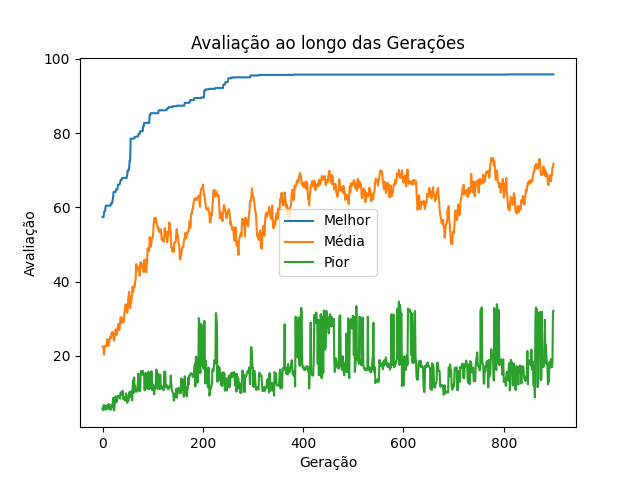

In [ ]:
from IPython.display import Image
Image('plot.png')